## Lab 1 – Deciphering Secret Messages
### Name: Richard Maduka                                                    <br>                      ID: vyd759

## Introduction

Encryption is the process of encoding information so that only authorized users can decrypt and read the information.

Symmetric cryptograpghy uses a single key for both encryption and decryption of messages and anyone who knows the secret key is able to read the inforamtion.

Block cipher is a symmetric encryption method that works by encrypting one block at a time, while stream ciphers work by encrypting one bit or byte of text at a time.

## Objective
The task in this lab is to decrypt a cipher text by analyzing a blackbox encryption program running on the host: cyber.range.maiti.info via netcat, and figure out the encryption and decryption methods, algorithms, and the key.

The program can be accessed by running nc cyber.range.maiti.info 39000 in a terminal.

In [89]:
cipherText = "544c4855584f400140464f48555255014449500144544f44"
host = "cyber.range.maiti.info"
port = "39000"

## Test Cases
I started by testing some sample texts on the program to deduce the encryption key and algorithm.
<br>
Test Cases: <br>

"a" = 2140 <br>
"b" = 2143 <br>
"c" = 2142 <br>
"d" = 2145 <br>
"z" = 215b <br>
"ab" = 4340 <br>
"bc" = 4243 <br>
"ac" = 4240 <br>
"abc" = 43402142 <br>
"abcd" = 43404542 <br>

## Encryption Technique
Based on the sample test results, one can deduce that the plain text is encrypted in two byte <b>blocks</b>. Two ascii characters/values make up a block but when only one charcter is encrypted the first half of the block is padded with the number "0x21." which happens to also be the key. 

The encryption algorithm swaps the first half of a block with the second half as a confusion techniques.



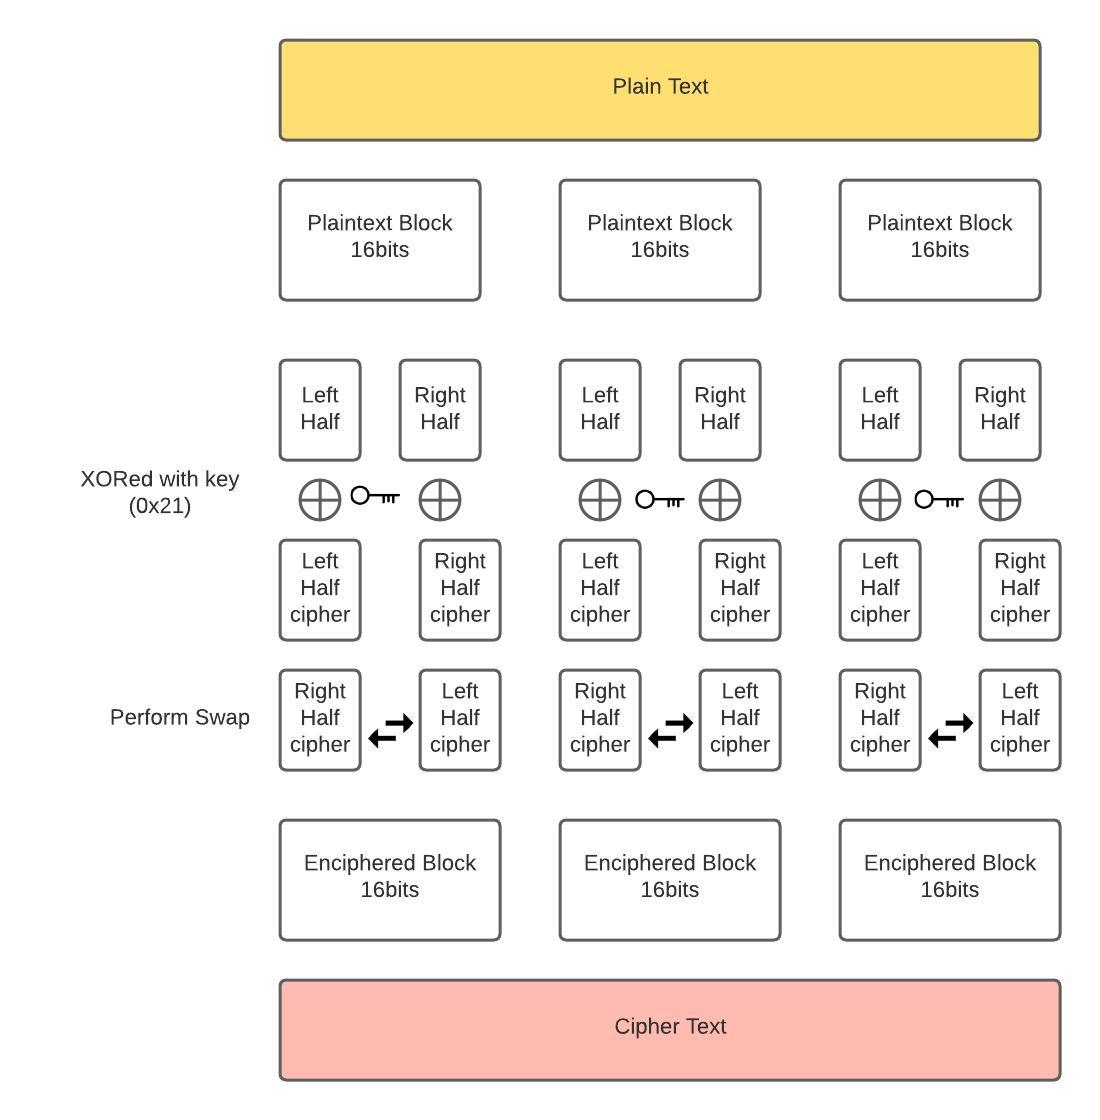

In [90]:
from IPython.display import Image
Image(filename='EncryptionAlgo.jpeg',width=800, height=400)

## Encryption Algorithm
I created two inverse functions for enciphering and deciphering one character at a time. Each character is XORed with a key - (0x21) to create the cipher for a single character. XOR is often used in cryptography because it is easily reversible and it depends on both inputs. The key size is small so this made it easy to find its value by comparing sample cipher values returned with the ascii code of the plain text characters.

After creating the single character encryption function I used this in the encrypt() function which calls enCipherChar() and swaps the left hand side and right hand side of a block.

In [94]:

#Dependency function for encrypting one character
def enCipherChar(val):
    cipher = ""
    asciiVal = ord(val)                             #converts ascii character to ascii value
    interVal = asciiVal ^ 0x21                      #XOR operation with the key 0x21
    cipher = str(hex(interVal).zfill(2))[2:]
    return cipher

#Used to encrypt the entire plain text message
def encrypt(text):
    cipherText  = ""                                #final encrypted output to be returned
    full_block = ""                                 #a full block comprises of 2 ascii characters
    isCompleteBlock = True                          #if a full block contains 2 ascii characters already
    i = 0                                           #control variable for while loop
    textLen = len(text)
    while i < textLen:
        half_block = enCipherChar(text[i])          #capture half a block and decipher the ascii code
        # SWAP LEFT AND RIGHT BLOCKS
        if isCompleteBlock:
            full_block += half_block                #append the half block to the full block
            if i == textLen - 1:                    #if last block is incomplete, pad head with 21
                cipherText += "21" + full_block
                break
            isCompleteBlock = False                 #mark a block as incomplete
        else:
            full_block =  half_block + full_block   #add diffusion: append half_block to the head of fb
            cipherText  += full_block               #append a full_block(complete block) to the final output
            isCompleteBlock = True                  #mark a block a complete
            full_block = ""                         #clear the full_block for the next block in string
        i += 1
    return cipherText

## Decryption Algorithm
The decryption algorithm is simply the inverse of the encryption algorithm. The XOR operation can be reveresed by XORing the cipher text with the key and the block swap can be reversed by swapping the two halves of the block again. Below is the decryption algorithm(similar to the encryption algorithm).

In [95]:
''' 
Purpose: used to decipher one character
'''
def deCipherChar(val):
    asciiVal = int(val, 16)       #asciiVal to decimal 
    asciiVal = asciiVal ^ 0x21    #confusion XOR operation 1
    plaintext = chr(asciiVal)     #convert the ascii val to plain text
    return plaintext

''' 
Purpose: Decrypting entire message
Dependency: deCipherChar
'''
#dependencies: deCipherChar(val):
def decrypt(text):
    finalPlainText  = ""                            #final decrypted output to be returned
    full_block = ""                                 #a full block comprises of 2 ascii hex values
    isCompleteBlock = True                          #True if last block is complete or full
    i = 0                                           #control variable for while loop
    while i < len(text):
        half_block = deCipherChar(text[i:i+2])      #capture half a block and decipher the ascii code
        # SWAP LEFT AND RIGHT BLOCKS
        if isCompleteBlock:
            full_block += half_block                #append the half block to the full block
            isCompleteBlock = False                 #mark a block as incomplete
        else:
            full_block =  half_block + full_block   #remove diffusion: append half_block to the head of fb
            finalPlainText += full_block            #append a full_block(complete block) to the final output
            isCompleteBlock = True                  #mark a block a complete
            full_block = ""                         #clear the full_block for the next block in string
        i += 2 
    return finalPlainText 


## Testing the Encryption and Decryption functions
To test the encryption and decryption algroithm, call decrypt(plainText) 
### Decryption Function Test

In [96]:
decrypt(cipherText)

'mutiny against the queen'

The decryption algroithm produces the text 'mutiny against the queen' which makes perfect sense in english.

### Ecryption Function Test

In [97]:
encrypt("mutiny against the queen")

'544c4855584f40140464f485552551444950144544f44'

The encryption function when applied to the resulting text of <span style="color:blue"> decrypt(cipherText)</span> prodcues exactly the same cipher text that was passed into the decryption algorithm.

Furthermore, we can run the encryption function with the original sample texts to check if the output matches the manual results gotten from our original sample test.

In [88]:
print("a:\t", encrypt("a"))
print("b:\t", encrypt("b"))
print("c:\t", encrypt("c"))
print("d:\t", encrypt("d"))
print("z:\t", encrypt("z"))
print("ab:\t", encrypt("ab"))
print("bc:\t", encrypt("bc"))
print("ac:\t", encrypt("ac"))
print("abc:\t", encrypt("abc"))
print("abcd:\t", encrypt("abcd"))

a:	 2140
b:	 2143
c:	 2142
d:	 2145
z:	 215b
ab:	 4340
bc:	 4243
ac:	 4240
abc:	 43402142
abcd:	 43404542


The results from the recreated encryption algorithm match the output from our original test cases. <br>
Original Test Cases from the blackbox netcat program running on cyber.range.maiti.info: <br>

"a" = 2140 <br>
"b" = 2143 <br>
"c" = 2142 <br>
"d" = 2145 <br>
"z" = 215b <br>
"ab" = 4340 <br>
"bc" = 4243 <br>
"ac" = 4240 <br>
"abc" = 43402142 <br>
"abcd" = 43404542 <br>

### Summary:
The encryption is a block cipher that uses 0x21 as the key. The given cipher text "544c4855584f400140464f48555255014449500144544f44" was decrypted to the plain text <b>"mutiny against the queen."</b>